## Euclidean Distance as a Baseline

In [1]:
ROOT_DIR = "../.."

In [2]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [3]:
import os
import h5py
import numpy as np   
import matplotlib.pyplot as plt
import sys
sys.path.append(ROOT_DIR) 
from cryoem.projections import RotationMatrix
from cryoem.conversions import euler2quaternion, d_q, euler2quaternion
from cryoem.plots import plot_euclidean_dPdQ
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from skimage.transform import resize

In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1620013145582151514
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10212685979488364815
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7701096635908222728
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3417767936
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3637279398076591738
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Distance function 

In [5]:
def d_p(in1, in2):
    in1 = in1.reshape((len(in1), -1))
    in2 = in2.reshape((len(in2), -1))
    return tf.norm(in1-in2, ord='euclidean', axis=1)

### Euclidean distance on Full-coverage for `5j0n` (asymmetric protein)

In [6]:
# full sphere coverage with non-uniform distribution
projections_filename = "../../data/5j0n_full.h5"

# load structures
data_full_5k = h5py.File(projections_filename, 'r')
angles_true = np.array(data_full_5k['Angles'], dtype=np.float32)
projections = np.array(data_full_5k['Projections'], dtype=np.float32)
label = "Full-coverage, Euler uniform"


print(f"{angles_true.shape[0]} projections of images with dimension {projections.shape[1:]} pixels")
print(f"{angles_true.shape[0]} sets of {angles_true.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


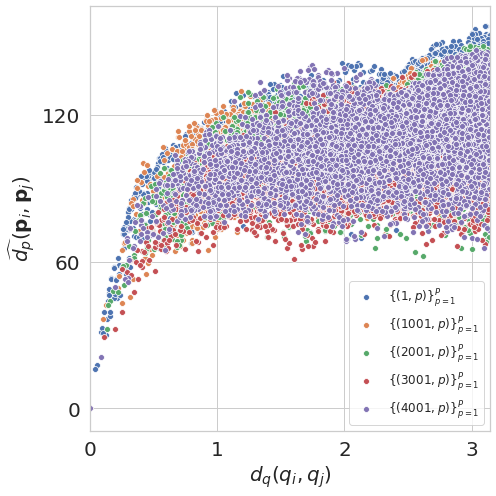

In [7]:
plot_euclidean_dPdQ(angles_true, projections, d_p)

### Euclidean distance on Full-coverage for `5a1a` (symmetric protein)

In [8]:
# full sphere coverage with non-uniform distribution
projections_filename = "../../data/5a1a_full.h5"

# load structures
data_full_5k = h5py.File(projections_filename, 'r')
angles_true = np.array(data_full_5k['Angles'], dtype=np.float32)
projections = np.array(data_full_5k['Projections'], dtype=np.float32)
label = "Full-coverage, Euler uniform"


print(f"{angles_true.shape[0]} projections of images with dimension {projections.shape[1:]} pixels")
print(f"{angles_true.shape[0]} sets of {angles_true.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (275, 275) pixels
5000 sets of 3 ground truth angles of corresponding projection images


In [9]:
dim = 116

projections_new = np.zeros((len(projections), dim, dim))
for i in range(len(projections)):
    p = projections[i]
    p = resize(p, (dim, dim))
    projections_new[i] = p

projections = projections_new.copy()

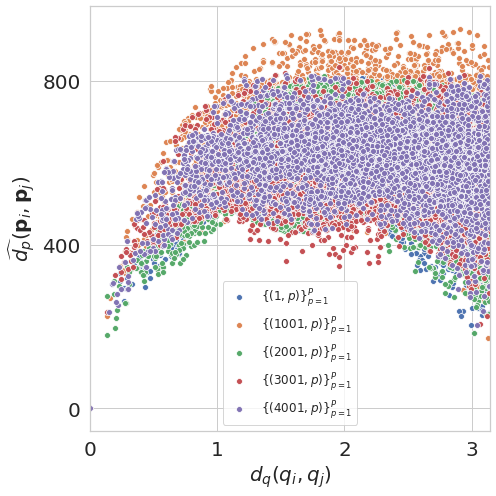

In [10]:
plot_euclidean_dPdQ(angles_true, projections, d_p)